In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import cleaned file
df = pd.read_csv("Clean_Smile_Data.csv")
df.reset_index(0, inplace = True)

# Filter out users who don't have a Confidence Score in a reasonable range
acc_ints_as_strings = [str(x) for x in list(range(0,21))]
df = df[df.Confidence.notnull()]
df = df[df.Confidence.apply(lambda x: x in acc_ints_as_strings)]

# Transform to Longform
ids = ['Subject','Confidence','Is_Female','Is_Male','Age','Children', 'Career']
values = ['Q01','Q02','Q03','Q04','Q05','Q06','Q07','Q08','Q09','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18', 'Q19','Q20']
df = pd.melt(df, id_vars = ids, value_vars= values, var_name= 'Question', value_name='Response')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create new column that says whether a comment was accurate or not.
df["Correct"] = df.Response.apply(lambda x: x in ["Genuine", "Fake"]) 

# Create a new df that records the overall accuracy of each subject
accuracy = pd.DataFrame(df.groupby("Subject").Correct.sum())
accuracy.reset_index(0, inplace= True)
accuracy.columns = ['Subject', 'Number_Correct']

# Join old dataframe back to original
df = df.merge(accuracy, on = "Subject")

# Create column that shows difference between Confidence and amount correct
df["Overestimation"] = df.apply(lambda row: int(row.Confidence) - int(row.Number_Correct), axis = 1)
df.head()

,Subject,Confidence,Is_Female,Is_Male,Age,Children,Career,Question,Response,Correct,Number_Correct,Overestimation
0,5537045516,15,Female,NaN,32,1,NaN,Q01,Genuine,True,15.0,0
1,5537045516,15,Female,NaN,32,1,NaN,Q02,Fake,True,15.0,0
2,5537045516,15,Female,NaN,32,1,NaN,Q03,NaN,False,15.0,0
3,5537045516,15,Female,NaN,32,1,NaN,Q04,NaN,False,15.0,0
4,5537045516,15,Female,NaN,32,1,NaN,Q05,Genuine,True,15.0,0


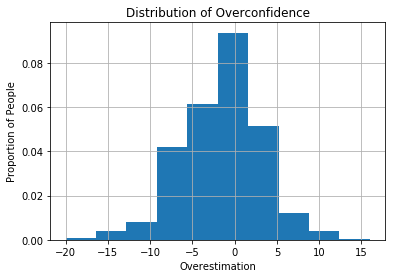

In [5]:
# Are people overconfident on this task? Compare predicted number correct to actual correct.
# Because histograms are normed, this controls for the fact that every user has 20 rows (one for each question))
df.Overestimation.hist(normed = True)  
plt.xlabel("Overestimation")
plt.ylabel("Proportion of People")
plt.title("Distribution of Overconfidence")
plt.show()

In [5]:
# What is the average number that people get correct?
print("Average Number Correct: " + str(df.Number_Correct.mean()))
print("Average Confidence: " + str(df.Confidence.astype("int").mean()))
print("Average Overconfidence: " + str(df.Overestimation.mean()))

Average Number Correct: 15.322838036948884
Average Confidence: 13.364524538138955
Average Overconfidence: -1.9583134988099287




Average Male Overestimation: -1.5100315372743742
Average Female Overestimation: -2.193275844010753


Standard Deviation Male Overestimation: 4.672322116672041
Standard Deviation Female Overestimation: 4.47005508375536


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


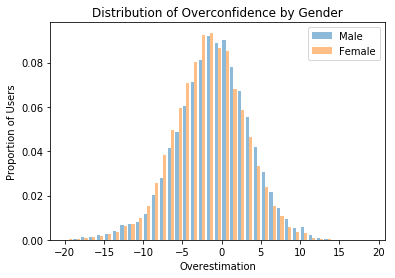

In [99]:
# Are men more overconfident than women? 

# Separate out men and women
men = df[df.Is_Male == "Male"].copy()
women = df[df.Is_Female == "Female"].copy()

# Print means
print("\n")
print("Average Male Overestimation: " + str(men.Overestimation.mean()))
print("Average Female Overestimation: " + str(women.Overestimation.mean()))

# Print Standard Deviations
print("\n")
print("Standard Deviation Male Overestimation: " + str(men.Overestimation.std()))
print("Standard Deviation Female Overestimation: " + str(women.Overestimation.std()))

# Create historgrams
bins = [x for x in list(range(-20,20))]
plt.hist([men.Overestimation, women.Overestimation], bins, alpha=0.5, label= ['Male', 'Female'], normed = True)
plt.legend(loc = 'upper right')
plt.xlabel("Overestimation")
plt.ylabel("Proportion of Users")
plt.title("Distribution of Overconfidence by Gender")
plt.show()

In [122]:
# Are younger people more overconfident than older people?

# Filter for users who with reasonable ages
reasonable_ages = [str(x) for x in list(range(10,80))]
age_df = df.copy()
age_df = age_df[age_df.Age.notnull()]
age_df = age_df[age_df.Age.apply(lambda x: x in reasonable_ages)]
    
# Find average overstimation per age
age_df = age_df.groupby("Age").Overestimation.agg(["mean",  "std"])
age_df.reset_index(0, inplace = True)

# Relabel Columns
age_df.columns = ["Age", "Mean_Overestimation", "Standard_Deviation"]

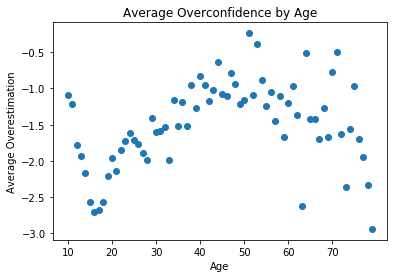

In [123]:
# Plot Overconfidence By Age
plt.scatter(x = age_df.Age.astype("int"), y = age_df.Mean_Overestimation)
plt.xlabel("Age")
plt.ylabel("Average Overestimation")
plt.title("Average Overconfidence by Age")
plt.xticks(np.arange(min(age_df.Age.astype("int")), max(age_df.Age.astype("int"))+1, 10))
plt.show()

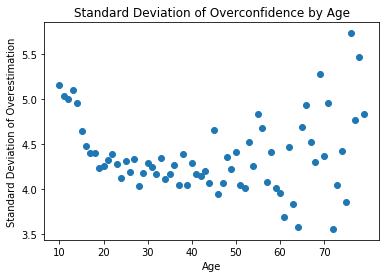

In [124]:
# Plot Columns
plt.scatter(x = age_df.Age.astype("int"), y = age_df.Standard_Deviation)
plt.xlabel("Age")
plt.ylabel("Standard Deviation of Overestimation")
plt.title("Standard Deviation of Overconfidence by Age")
plt.xticks(np.arange(min(age_df.Age.astype("int")), max(age_df.Age.astype("int"))+1, 10))
plt.show()



Average Overestimation for those with Careers: -1.735924617196702
Average Overestimation for those without Careers: -2.154145714393739


Standard Deviation of Overestimation for those with Careers: 4.672452994045368
Standard Deviation of Overestimation for those without Careers: 4.500686009065355


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


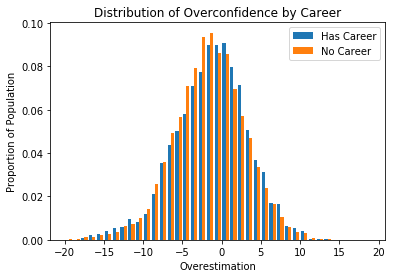

In [103]:
# Do subjects who have had a job “reading people” think they’ll do better on the smile test? 
# Do they actually do better? Some research has shown experts tend to be overconfident more often 
# than novices (Bradley, 1981).

# Clean out joke or unreasonable answers
reasonable_career = [str(x) for x in list(range(0,5))]
career_df = df[(df.Career.notnull()) & (df.Career.apply(lambda x: x in reasonable_career))].copy()

# Create binary column for having / not having careers
career_df["has_career"] = career_df.Career.apply(lambda x: int(x) > 0)

career = career_df[career_df.has_career]
wo_career = career_df[career_df.has_career == False]

# Print means
print("\n")
print("Average Overestimation for those with Careers: " + str(career.Overestimation.mean()))
print("Average Overestimation for those without Careers: " + str(wo_career.Overestimation.mean()))

# Print Standard Deviations
print("\n")
print("Standard Deviation of Overestimation for those with Careers: " + str(career.Overestimation.std()))
print("Standard Deviation of Overestimation for those without Careers: " + str(wo_career.Overestimation.std()))

# Create histogram
plt.hist([career.Overestimation, wo_career.Overestimation], bins, label= ['Has Career', 'No Career'], normed = True)
plt.legend(loc = 'upper right')
plt.xlabel("Overestimation")
plt.ylabel("Proportion of Population")
plt.title("Distribution of Overconfidence by Career")
plt.show()

In [80]:
# Do overconfident people tend to miss questions relative to underconfident people?

# Get proportion correct for each question
questions = pd.DataFrame(df.groupby("Question").apply(lambda x: x.Correct.mean()))

# Reset index and rename columns (in preparation for a merge down the line)
questions.reset_index(0, inplace= True)
questions.columns = ["Question", "Proportion_Correct"]

# Join old dataframe back to original
questions = questions.merge(df, on = "Question")

# Label users as over-estimators / under-estimators / non-delusionals
def label_accuracy(x):
    '''Returns label to signify whether user overestimated, underestimated, or precisely estimated performance.'''
    if int(x.Confidence) > int(x.Number_Correct):
        return "Overestimator"
    elif int(x.Confidence) < int(x.Number_Correct):
        return "Underestimator"
    else:
        return "Non-Delusional"
    
questions["Estimator_Status"] = questions.apply(label_accuracy, axis = 1)



Average Number Correct for Overestimators: 13.819383945239577
Average Number Correct for Underestimators: 16.070537603034502
Average Number Correct for Accurates: 15.017703722988806


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


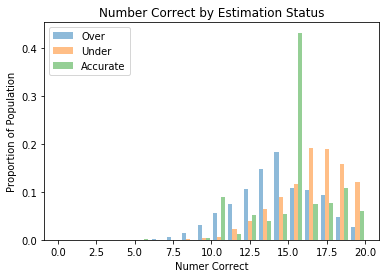

In [87]:
# Does overconfidence at least predict better performance?
over = questions[questions.Estimator_Status == "Overestimator"]
under = questions[questions.Estimator_Status == "Underestimator"]
acc = questions[questions.Estimator_Status == "Non-Delusional"]

# Get Means for each
print("\n")
print("Average Number Correct for Overestimators: " + str(over.Number_Correct.mean()))
print("Average Number Correct for Underestimators: " + str(under.Number_Correct.mean()))
print("Average Number Correct for Accurates: " + str(acc.Number_Correct.mean()))

# Define Bins
bins = [x for x in list(range(0, 21))]

# Create Histogram
plt.hist([over.Number_Correct, under.Number_Correct, acc.Number_Correct], bins, alpha=0.5, label= ['Over', 'Under', 'Accurate'], normed = True)
plt.legend(loc = 'upper left')
plt.xlabel("Numer Correct")
plt.ylabel("Proportion of Population")
plt.title("Number Correct by Estimation Status")
plt.show()

In [131]:
# Get Proportion of the population that fits each description:
questions.groupby("Estimator_Status").Subject.nunique() / questions.Subject.nunique()

Estimator_Status
Non-Delusional    0.087068
Overestimator     0.291420
Underestimator    0.621512
Name: Subject, dtype: float64